In [153]:
import pandas as pd
import os

##import statements saved as txt files

statements_list=[]
from pathlib import Path
#p1 = Path(__file__).parent
path_final = Path.cwd() #/"mpc"-- add this if neccessary, in case of directory issues.
os.chdir(path_final)
file_list = os.listdir()
file_list_txt = filter(lambda x: x[-4:] == '.txt', file_list) 
file_list_txt = list(file_list_txt)
for file in file_list_txt:
    statement_file = open(file,"r",encoding="utf8")
    statement_file = statement_file.read()
    statements_list.append(statement_file)

## Creating Date and Name columns

# remove .txt from file name
file_list_v1 = []
for i in file_list_txt:
    i1 = i.replace(".txt","")
    file_list_v1.append(i1)
    #print(file_list_v1)

#separate date and name
file_list_date = [] ; file_list_name = []
for j in file_list_v1:
    j1 = j.split("_")
    j2 = j1[0]
    j3 = j1[1]
    file_list_date.append(j2)
    file_list_name.append(j3)

## Create DataFrame with Date, Name and Statement Columns

df_statements_raw = pd.DataFrame(list(zip(file_list_date,file_list_name,statements_list)),columns=("Date of Meeting","Name of Member","Statement_raw"))
df_statements_raw["Name of Member"] = df_statements_raw["Name of Member"].replace(["ChetanGhate","PamiDua","MichaelDPatra","RavindraHDholakia","Resolution","ViralVAcharya"],["Dr.Ghate","Dr.Dua","Dr.Patra","Dr.Dholakia","Resolution Statement","Dr.Acharya"])
df_statements_raw["Name of Member"] = df_statements_raw["Name of Member"].replace(["GovernorDas","GovernorPatel"],"The Governor")


#Drop Data of Dr.Acharya
df_temp = df_statements_raw.set_index("Name of Member")
df_temp = df_temp.drop("Dr.Acharya")
df_statements_raw = df_temp.reset_index()
pd.set_option('display.max_rows',None)
df_statements_raw

,Name of Member,Date of Meeting,Statement_raw
0,Dr.Ghate,20170816,27. While a significant decline in both headli...
1,The Governor,20170816,56. Excluding the house rent allowance (HRA) i...
2,Dr.Patra,20170816,44. I have consistently maintained that an inf...
3,Dr.Dua,20170816,"32. Retail inflation has softened, touching a ..."
4,Dr.Dholakia,20170816,"36. In the MPC meeting of 7th June 2017, I ple..."
5,Resolution Statement,20170816,5. On the basis of an assessment of the curren...
6,Dr.Ghate,20171018,"27. In the August review, I was concerned that..."
7,The Governor,20171018,51. Headline CPI inflation has risen sharply i...
8,Dr.Patra,20171018,40. Recent inflation prints have vindicated my...
9,Dr.Dua,20171018,"32. On the inflation front, retail inflation r..."


In [154]:
# Function to apply preprocessing steps to the list of raw data statements
def apply_process(function,apply_on):
    i=0
    while i < len(apply_on):
        apply_on[i] = function(apply_on[i])
        i+=1
    return(apply_on)

In [166]:
# Decontraction i.e., correcting english language short forms
# Example : decontracted(I've come home) --> I have come home

import re
def decontracted(phrase):
    
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

#decontracted("I've come home")

## Decontraction of statements
st_list = df_statements_raw.Statement_raw.copy()
spp1 = apply_process(decontracted,st_list)
spp1

0     27. While a significant decline in both headli...
1     56. Excluding the house rent allowance (HRA) i...
2     44. I have consistently maintained that an inf...
3     32. Retail inflation has softened, touching a ...
4     36. In the MPC meeting of 7th June 2017, I ple...
5     5. On the basis of an assessment of the curren...
6     27. In the August review, I was concerned that...
7     51. Headline CPI inflation has risen sharply i...
8     40. Recent inflation prints have vindicated my...
9     32. On the inflation front, retail inflation r...
10    39. During the last two months of July and Aug...
11    5. On the basis of an assessment of the curren...
12    25. Since the last review, headline inflation ...
13    49. The inflation scenario has evolved by and ...
14    38. I vote for status quo.\n\n39. All the upsi...
15    30. Inflation as measured by the CPI recorded ...
16    36. I am not in agreement with the assessment ...
17    5. On the basis of an assessment of the cu

In [168]:
#remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
def num_remove(x):
    num_removed = re.sub("\S*\d\S*", "", x).strip()
    return(num_removed)

spp2=apply_process(num_remove,spp1)
spp2

0     While a significant decline in both headline i...
1     Excluding the house rent allowance (HRA) impac...
2     I have consistently maintained that an inflati...
3     Retail inflation has softened, touching a new ...
4     In the MPC meeting of  June  I pleaded for a r...
5     On the basis of an assessment of the current a...
6     In the August review, I was concerned that the...
7     Headline CPI inflation has risen sharply in th...
8     Recent inflation prints have vindicated my sta...
9     On the inflation front, retail inflation recor...
10    During the last two months of July and August,...
11    On the basis of an assessment of the current a...
12    Since the last review, headline inflation has ...
13    The inflation scenario has evolved by and larg...
14    I vote for status quo.\n\n All the upside risk...
15    Inflation as measured by the CPI recorded an u...
16    I am not in agreement with the assessment of t...
17    On the basis of an assessment of the curre

In [169]:
#remove special character: https://stackoverflow.com/a/5843547/4084039
def rem_spchar(x):
    removed_spchar = re.sub('[^A-Za-z0-9]+', ' ', x)
    return(removed_spchar)

spp3 = apply_process(rem_spchar,spp2)
spp3

0     While a significant decline in both headline i...
1     Excluding the house rent allowance HRA impact ...
2     I have consistently maintained that an inflati...
3     Retail inflation has softened touching a new l...
4     In the MPC meeting of June I pleaded for a rat...
5     On the basis of an assessment of the current a...
6     In the August review I was concerned that the ...
7     Headline CPI inflation has risen sharply in th...
8     Recent inflation prints have vindicated my sta...
9     On the inflation front retail inflation record...
10    During the last two months of July and August ...
11    On the basis of an assessment of the current a...
12    Since the last review headline inflation has i...
13    The inflation scenario has evolved by and larg...
14    I vote for status quo All the upside risks to ...
15    Inflation as measured by the CPI recorded an u...
16    I am not in agreement with the assessment of t...
17    On the basis of an assessment of the curre

In [170]:
#Tokenization of statements using gensim

import gensim
spp4 = spp3.apply(gensim.utils.simple_preprocess)
spp4

0     [while, significant, decline, in, both, headli...
1     [excluding, the, house, rent, allowance, hra, ...
2     [have, consistently, maintained, that, an, inf...
3     [retail, inflation, has, softened, touching, n...
4     [in, the, mpc, meeting, of, june, pleaded, for...
5     [on, the, basis, of, an, assessment, of, the, ...
6     [in, the, august, review, was, concerned, that...
7     [headline, cpi, inflation, has, risen, sharply...
8     [recent, inflation, prints, have, vindicated, ...
9     [on, the, inflation, front, retail, inflation,...
10    [during, the, last, two, months, of, july, and...
11    [on, the, basis, of, an, assessment, of, the, ...
12    [since, the, last, review, headline, inflation...
13    [the, inflation, scenario, has, evolved, by, a...
14    [vote, for, status, quo, all, the, upside, ris...
15    [inflation, as, measured, by, the, cpi, record...
16    [am, not, in, agreement, with, the, assessment...
17    [on, the, basis, of, an, assessment, of, t

In [171]:
## Lemmetization of data

from nltk.stem.wordnet import WordNetLemmatizer

wordnet = WordNetLemmatizer()
lemm_statements = []
for statement in spp4:
    final_statement = []
    for word in statement:
        final_statement.append(wordnet.lemmatize(word))
    lemm_statements.append(final_statement)

spp5 = lemm_statements
spp5

[['while',
  'significant',
  'decline',
  'in',
  'both',
  'headline',
  'inflation',
  'and',
  'inflation',
  'excluding',
  'food',
  'and',
  'fuel',
  'provides',
  'reason',
  'for',
  'cautious',
  'optimism',
  'it',
  'remains',
  'unclear',
  'at',
  'this',
  'juncture',
  'whether',
  'these',
  'outcome',
  'will',
  'sustain',
  'durably',
  'in',
  'the',
  'future',
  'in',
  'fact',
  'it',
  'is',
  'highly',
  'likely',
  'that',
  'inflation',
  'excluding',
  'food',
  'and',
  'fuel',
  'bottomed',
  'out',
  'in',
  'june',
  'momentum',
  'in',
  'june',
  'headline',
  'index',
  'ha',
  'also',
  'picked',
  'up',
  'because',
  'of',
  'the',
  'seasonal',
  'rebound',
  'of',
  'some',
  'vegetable',
  'with',
  'reversal',
  'in',
  'the',
  'headline',
  'inflation',
  'trajectory',
  'expected',
  'from',
  'july',
  'however',
  'what',
  'is',
  'encouraging',
  'is',
  'that',
  'both',
  'the',
  'and',
  'median',
  'inflation',
  'expectation',
  

In [160]:
#Final Cleaned Data and Summary Stats   
df_statements_raw["Cleaned Statements"] = spp3
df_statements_raw["Tokenized & Lemmetized Statements"] = spp5
df_statements_raw.describe()

,Name of Member,Date of Meeting,Statement_raw,Cleaned Statements,Tokenized & Lemmetized Statements
count,90,90,90,90,90
unique,6,15,90,90,90
top,Dr.Ghate,20170816,27. While a significant decline in both headli...,While a significant decline in both headline i...,"[while, significant, decline, in, both, headli..."
freq,15,6,1,1,1


In [161]:
# Vectorization using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3))
cleared_vector_tfidf = vectorizer.fit_transform(df_statements_raw["Tokenized & Lemmetized Statements"].astype(str))
cleared_vector_tfidf.get_shape()

# Appending the TF-IDF statement vectors, to the master data file (df_statements_raw)

Statement_vector_tfidf = []
for i in range(0,90):
    l = list(cleared_vector_tfidf[i,:].toarray()[0])    
    Statement_vector_tfidf.append(l)
Statement_vector_tfidf

df_statements_raw["Statement_vector_tfidf"] = Statement_vector_tfidf
df_statements_raw

,Name of Member,Date of Meeting,Statement_raw,Cleaned Statements,Tokenized & Lemmetized Statements,Statement_vector_tfidf
0,Dr.Ghate,20170816,27. While a significant decline in both headli...,While a significant decline in both headline i...,"[while, significant, decline, in, both, headli...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,The Governor,20170816,56. Excluding the house rent allowance (HRA) i...,Excluding the house rent allowance HRA impact ...,"[excluding, the, house, rent, allowance, hra, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Dr.Patra,20170816,44. I have consistently maintained that an inf...,I have consistently maintained that an inflati...,"[have, consistently, maintained, that, an, inf...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Dr.Dua,20170816,"32. Retail inflation has softened, touching a ...",Retail inflation has softened touching a new l...,"[retail, inflation, ha, softened, touching, ne...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Dr.Dholakia,20170816,"36. In the MPC meeting of 7th June 2017, I ple...",In the MPC meeting of June I pleaded for a rat...,"[in, the, mpc, meeting, of, june, pleaded, for...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,Resolution Statement,20170816,5. On the basis of an assessment of the curren...,On the basis of an assessment of the current a...,"[on, the, basis, of, an, assessment, of, the, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,Dr.Ghate,20171018,"27. In the August review, I was concerned that...",In the August review I was concerned that the ...,"[in, the, august, review, wa, concerned, that,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,The Governor,20171018,51. Headline CPI inflation has risen sharply i...,Headline CPI inflation has risen sharply in th...,"[headline, cpi, inflation, ha, risen, sharply,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,Dr.Patra,20171018,40. Recent inflation prints have vindicated my...,Recent inflation prints have vindicated my sta...,"[recent, inflation, print, have, vindicated, m...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,Dr.Dua,20171018,"32. On the inflation front, retail inflation r...",On the inflation front retail inflation record...,"[on, the, inflation, front, retail, inflation,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


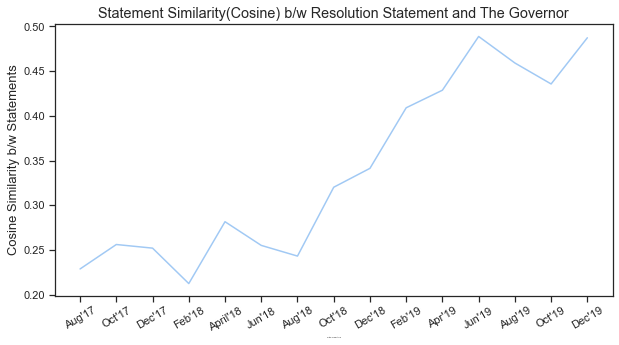

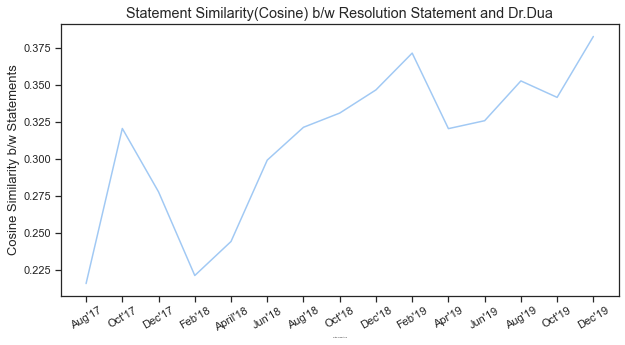

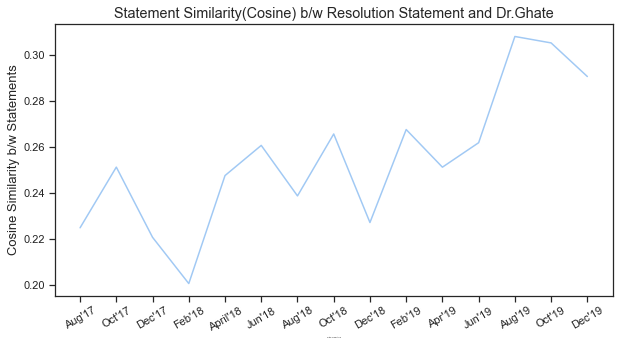

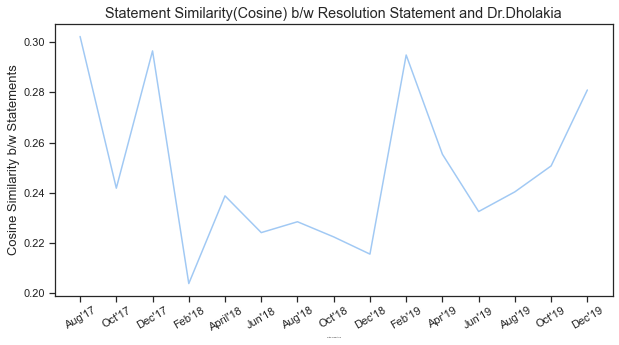

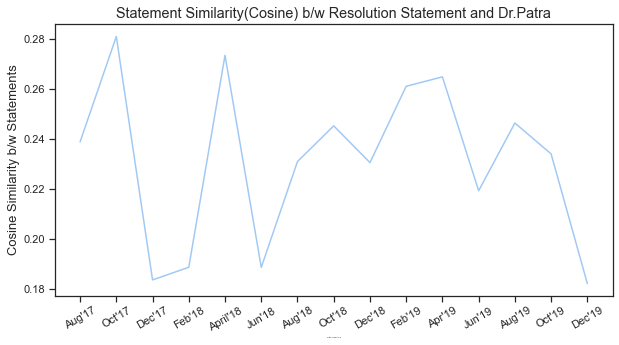

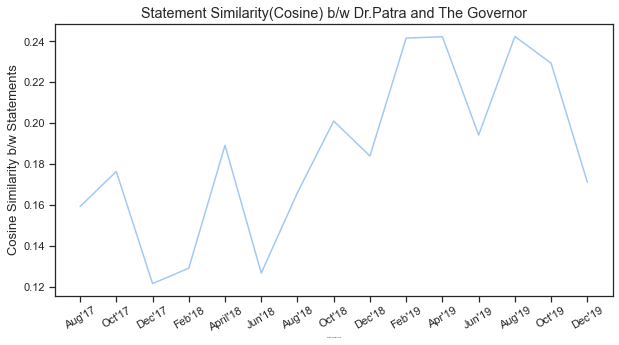

In [162]:
### Cosine Similarity b/w statements of two members

# Function for checking Cosine Similarity b/w 2 members
def cos_sim(x,y):
    from scipy import spatial
    cosdis = spatial.distance.cosine(x,y)
    cos_sim = 1-cosdis
    return(cos_sim)

# Modifying the index of the original dataframe for easy access
df_st_index = df_statements_raw.set_index([df_statements_raw["Date of Meeting"],df_statements_raw["Name of Member"]])

# Function to get a list of all the Cosine Similarities b/w two members, over the 15 MPC meetings from Aug'17 to Dec'19
def statement_similarity(p,q):
    #p=input("Enter Name of First Member : ")
    #q=input("Enter Name of Second Member : ")
    sim_m1_m2 = []
    for i in df_statements_raw["Date of Meeting"].unique():
        a = df_st_index.loc[(i,p)]["Statement_vector_tfidf"]
        b = df_st_index.loc[(i,q)]["Statement_vector_tfidf"]
        sim_m1_m2.append(cos_sim(a,b))
    return(sim_m1_m2)

# Function to plot time series plot of cosine similarity b/w statements of any two members
def time_series_cos_sim(h,k):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set_theme(style="ticks",palette="pastel")
    x_labels=["Aug'17","Oct'17","Dec'17","Feb'18","April'18","Jun'18","Aug'18","Oct'18","Dec'18","Feb'19","Apr'19","Jun'19","Aug'19","Oct'19","Dec'19"]
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(x=x_labels, y = statement_similarity(h,k))
    sns.set(font_scale=1.2)
    plt.ylabel("Cosine Similarity b/w Statements",fontsize=13)
    plt.xlabel("Date of Meeting",fontsize=2)
    plt.xticks(rotation=30)
    plt.title("Statement Similarity(Cosine) b/w {} and {}".format(h,k))
    plt.show()


time_series_cos_sim("Resolution Statement","The Governor")
time_series_cos_sim("Resolution Statement","Dr.Dua")
time_series_cos_sim("Resolution Statement","Dr.Ghate")
time_series_cos_sim("Resolution Statement","Dr.Dholakia")
time_series_cos_sim("Resolution Statement","Dr.Patra")
time_series_cos_sim("Dr.Patra","The Governor")

In [163]:
def TTest_CosSim(p,q):
    
    sim_m1_m2 = statement_similarity(p,q)
    pre_2019 = np.array(sim_m1_m2[:9])
    post_2019 = np.array(sim_m1_m2[9:15])  
    
    import scipy.stats as st
    result = st.ttest_ind(post_2019,pre_2019)
    #print(result)
    p_value = list(result)[1]
    print(p_value) 
    if p_value < 0.05:
        print("We reject Null hypothesis i.e., we conclude that Mean Cosine Similarity between {} and {} has changed significantly before and after 2019.".format(p,q))
    else:
        print("Null Hypothesis is true i.e., Mean Cosine Similarity between statements of {} and {} has NOT signigicantly changed.".format(p,q))

for i in df_statements_raw["Name of Member"].unique():
  if ((i != "The Governor") and (i != "Resolution Statement")):
    TTest_CosSim(i,"The Governor")

4.798919357785715e-05
We reject Null hypothesis i.e., we conclude that Mean Cosine Similarity between Dr.Ghate and The Governor has changed significantly before and after 2019.
0.0024904307058387395
We reject Null hypothesis i.e., we conclude that Mean Cosine Similarity between Dr.Patra and The Governor has changed significantly before and after 2019.
0.006567897667534104
We reject Null hypothesis i.e., we conclude that Mean Cosine Similarity between Dr.Dua and The Governor has changed significantly before and after 2019.
0.0005266154860907084
We reject Null hypothesis i.e., we conclude that Mean Cosine Similarity between Dr.Dholakia and The Governor has changed significantly before and after 2019.


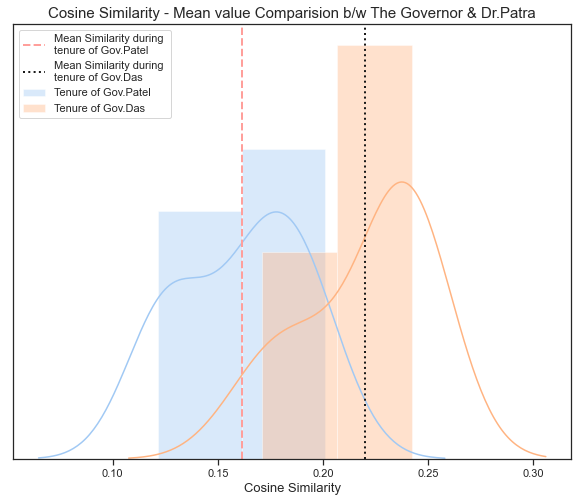

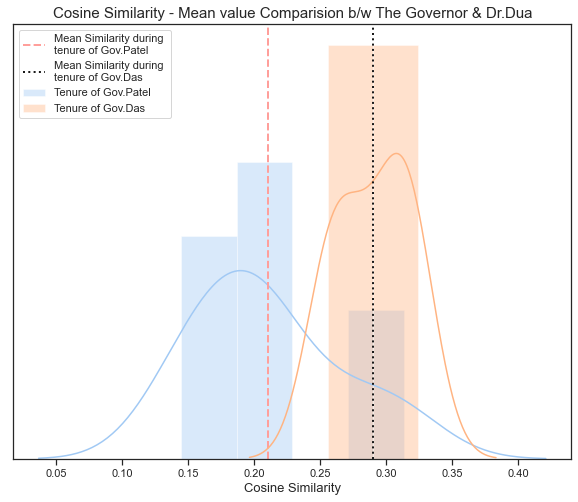

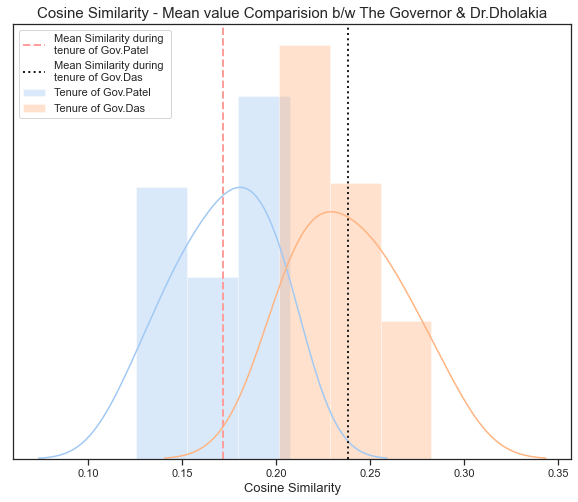

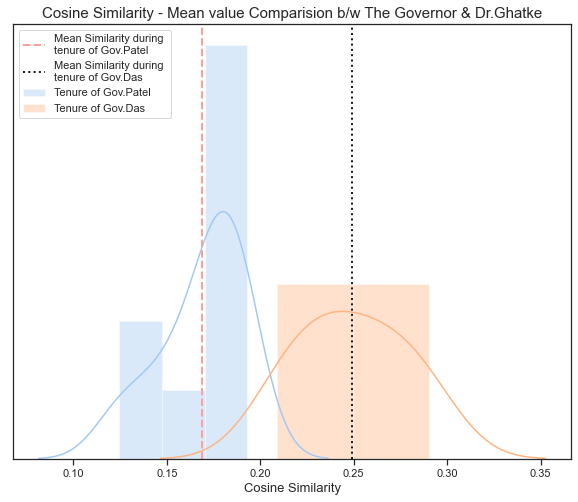

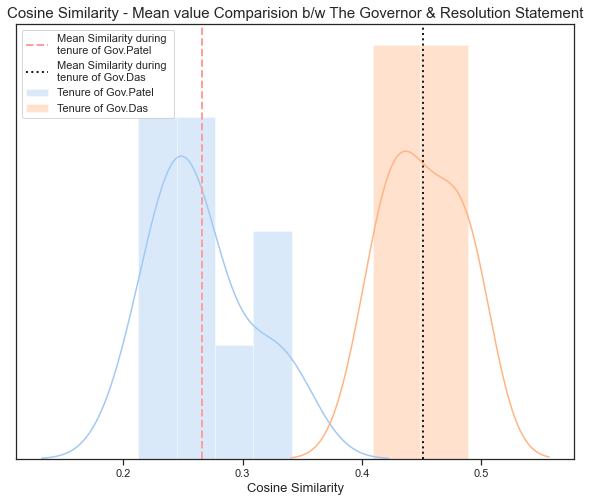

In [164]:
df_st_index = df_statements_raw.set_index([df_statements_raw["Date of Meeting"],df_statements_raw["Name of Member"]])
### Graphical check of cosine similarity mean values
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sim_a_b = [];sim_a_c=[];sim_a_d=[];sim_a_e=[];sim_a_f=[]
#print(df_statements_raw["Date of Meeting"].unique())
for i in df_statements_raw["Date of Meeting"].unique():
        a = df_st_index.loc[(i,"The Governor")]["Statement_vector_tfidf"]
        b = df_st_index.loc[(i,"Dr.Patra")]["Statement_vector_tfidf"]
        c = df_st_index.loc[(i,"Dr.Dua")]["Statement_vector_tfidf"]
        d = df_st_index.loc[(i,"Dr.Dholakia")]["Statement_vector_tfidf"]
        e = df_st_index.loc[(i,"Dr.Ghate")]["Statement_vector_tfidf"]
        f = df_st_index.loc[(i,"Resolution Statement")]["Statement_vector_tfidf"]
        #print(a)
        #print(b)
        #print(cos_sim(a,b))
        sim_a_b.append(cos_sim(a,b))
        sim_a_c.append(cos_sim(a,c))
        sim_a_d.append(cos_sim(a,d))
        sim_a_e.append(cos_sim(a,e))
        sim_a_f.append(cos_sim(a,f))
list_cos_sim = [sim_a_b,sim_a_c,sim_a_d,sim_a_e,sim_a_f]
list_names = ["Dr.Patra","Dr.Dua","Dr.Dholakia","Dr.Ghatke","Resolution Statement"]
for j,h in zip(list_cos_sim, list_names):
  pre_2019 = np.array(j[:9])
  post_2019 = np.array(j[9:15])
  #print(pre_2019)
  #print(sum(pre_2019))
  #print(post_2019)
  #print(sum(post_2019))
  sns.set_theme(style="ticks",palette="pastel")
  fig, ax = plt.subplots(figsize=(10,8))
  ax.axes.yaxis.set_visible(False)
  sns.distplot(pre_2019,label = "Tenure of Gov.Patel")
  plt.xlabel("Cosine Similarity",fontsize = 13)
  plt.title("Cosine Similarity - Mean value Comparision b/w The Governor & {}".format(h),fontsize = 15)
  plt.axvline(np.mean(pre_2019), color="r", linestyle="dashed", linewidth=2, label = "Mean Similarity during \ntenure of Gov.Patel")
  sns.distplot(post_2019, label = "Tenure of Gov.Das")
  plt.axvline(np.mean(post_2019), color="k", linestyle="dotted", linewidth=2, label = "Mean Similarity during \ntenure of Gov.Das")
  plt.legend(loc='upper left')


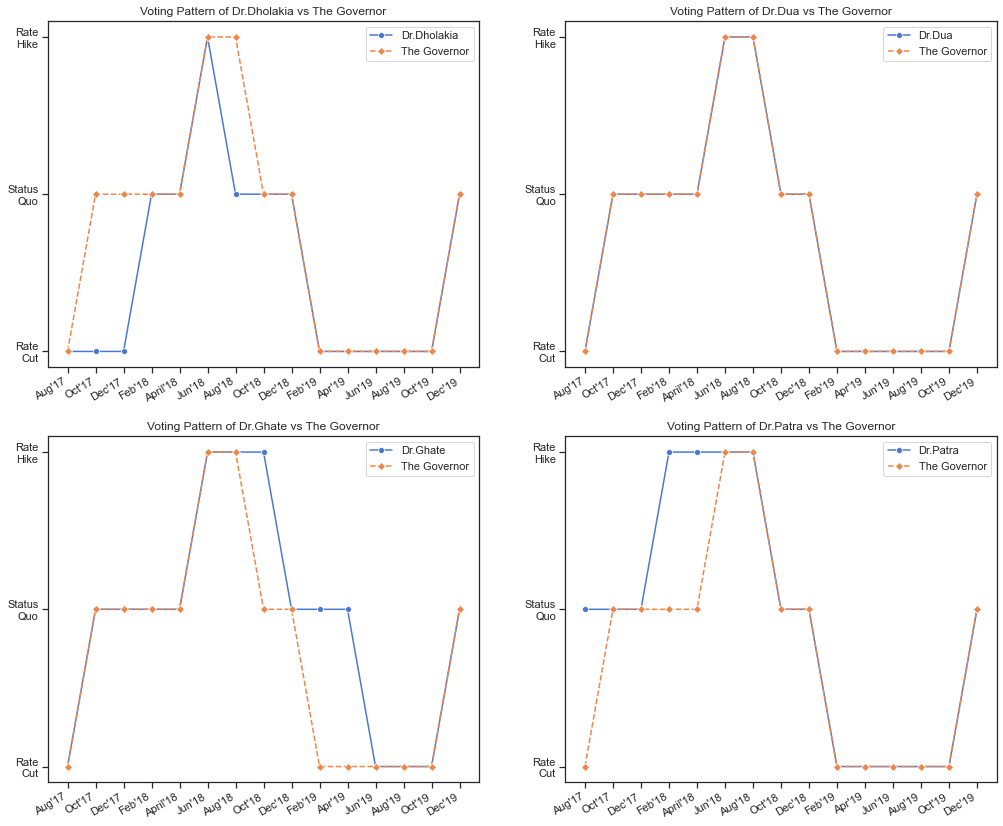

In [165]:
### Voting Data Frame
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.warn("")
vote = pd.read_csv("voting.csv")
vote = vote.fillna(0)
vote["Rate Vote"].replace({"DEC": -1, "INC": +1}, inplace=True)
vote['Date of Meeting']=vote['Date of Meeting'].astype(str)
df_statements_raw_vote = df_statements_raw.merge(vote, on = ["Name of Member","Date of Meeting"], how="left")
df_statements_raw_vote = df_statements_raw_vote.drop("Unnamed: 3",axis=1)
df_statements_raw_vote.rename(columns = {'Rate Vote':'Voting on Policy Rate'}, inplace = True)
x_labels=["Aug'17","Oct'17","Dec'17","Feb'18","April'18","Jun'18","Aug'18","Oct'18","Dec'18","Feb'19","Apr'19","Jun'19","Aug'19","Oct'19","Dec'19"]


df_vote_indexed = df_statements_raw_vote.set_index([df_statements_raw_vote["Date of Meeting"],df_statements_raw_vote["Name of Member"]])
vote_govr=[];vote_patra=[];vote_ghate=[];vote_dua=[];vote_dholakia=[]
for i in df_vote_indexed["Date of Meeting"].unique():
    vote_govr.append(df_vote_indexed.loc[(i,"The Governor")]["Voting on Policy Rate"])
    vote_patra.append(df_vote_indexed.loc[(i,"Dr.Patra")]["Voting on Policy Rate"])
    vote_dua.append(df_vote_indexed.loc[(i,"Dr.Dua")]["Voting on Policy Rate"])
    vote_dholakia.append(df_vote_indexed.loc[(i,"Dr.Dholakia")]["Voting on Policy Rate"])
    vote_ghate.append(df_vote_indexed.loc[(i,"Dr.Ghate")]["Voting on Policy Rate"])
df_onlyvote=pd.DataFrame(list(zip(x_labels,vote_dholakia,vote_dua,vote_govr,vote_patra,vote_ghate)),columns=["xlabel","Dr.Dholakia","Dr.Dua","The Governor","Dr.Patra","Dr.Ghate"])


import seaborn as sns
sns.set_theme(style="ticks",palette="muted")
x_labels=["Aug'17","Oct'17","Dec'17","Feb'18","April'18","Jun'18","Aug'18","Oct'18","Dec'18","Feb'19","Apr'19","Jun'19","Aug'19","Oct'19","Dec'19"]
fig, axes = plt.subplots(2,2,figsize=(17,14))
a = sns.lineplot(data=df_onlyvote,x="xlabel",y = "Dr.Dholakia",ax=axes[0,0],marker= 'o')
sns.lineplot(data=df_onlyvote,x="xlabel",y = "The Governor",linestyle='dashed',marker='D',ax=axes[0,0])
a.set_xticklabels(x_labels,rotation=30, horizontalalignment='right')
a.set(xlabel=None,ylabel=None)
a.set_title("Voting Pattern of Dr.Dholakia vs The Governor")
a.set_yticks([-1,0,1])
a.set_yticklabels(["Rate\nCut","Status\nQuo","Rate\nHike"],rotation=0, horizontalalignment='right')
a.legend(["Dr.Dholakia","The Governor"])
b = sns.lineplot(data=df_onlyvote,x="xlabel",y = "Dr.Dua",ax=axes[0,1],marker= 'o')
sns.lineplot(data=df_onlyvote,x="xlabel",y = "The Governor",linestyle='dashed',marker= 'D',ax=axes[0,1])
b.set_xticklabels(x_labels,rotation=30, horizontalalignment='right')
b.set(xlabel=None,ylabel=None)
b.set_title("Voting Pattern of Dr.Dua vs The Governor")
b.set_yticks([-1,0,1])
b.set_yticklabels(["Rate\nCut","Status\nQuo","Rate\nHike"],rotation=0, horizontalalignment='right')
b.legend(["Dr.Dua","The Governor"])
c = sns.lineplot(data=df_onlyvote,x="xlabel",y = "Dr.Ghate",ax=axes[1,0],marker= 'o')
sns.lineplot(data=df_onlyvote,x="xlabel",y = "The Governor",linestyle='dashed',ax=axes[1,0],marker= 'D')
c.set_xticklabels(x_labels,rotation=30, horizontalalignment='right')
c.set(xlabel=None,ylabel=None)
c.set_title("Voting Pattern of Dr.Ghate vs The Governor")
c.set_yticks([-1,0,1])
c.set_yticklabels(["Rate\nCut","Status\nQuo","Rate\nHike"],rotation=0, horizontalalignment='right')
c.legend(["Dr.Ghate","The Governor"])
d = sns.lineplot(data=df_onlyvote,x="xlabel",y = "Dr.Patra",ax=axes[1,1],marker= 'o')
sns.lineplot(data=df_onlyvote,x="xlabel",y = "The Governor",linestyle='dashed',marker= 'D',ax=axes[1,1])
d.set_xticklabels(x_labels,rotation=30, horizontalalignment='right')
d.set(xlabel=None,ylabel=None)
d.set_title("Voting Pattern of Dr.Patra vs The Governor")
d.set_yticks([-1,0,1])
d.set_yticklabels(["Rate\nCut","Status\nQuo","Rate\nHike"],rotation=0, horizontalalignment='right')
d.legend(["Dr.Patra","The Governor"])
plt.show()